### 1. Load data

In [48]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary
import math
from datasets import Dataset, Features, Array2D, Value, load_dataset, load_from_disk

In [49]:
loaded_data = load_from_disk(
        "/Users/yijiachen/Desktop/50.021 Artificial Intelligence/Project/code/code-repo/dataset/even_label/21x21_train.hf"
    ).with_format("torch")

print(loaded_data.shape)
print(loaded_data[0])

(300000, 3)
{'data': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1],
        [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1, 0, 0, 

In [50]:
batch_size = 16
train_set_size = math.floor(0.8*loaded_data.shape[0])
train_set, val_set = torch.utils.data.random_split(loaded_data, [train_set_size, loaded_data.shape[0] - train_set_size])
trainLoader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
testLoader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle=False)

classes = ('END', 'LEFT', 'RIGHT', 'UP', 'DOWN')

test the dataloader

(tensor(1), tensor(4), tensor(2), tensor(3))

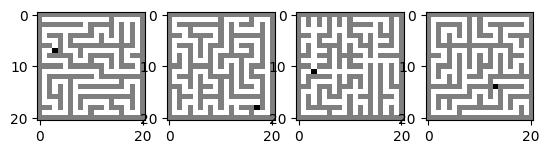

In [51]:
# test the dataloader
dataiter = iter(trainLoader)
this_iter = next(dataiter)
this_iter['data'], this_iter['label']
# mazes, filenames, labels = next(dataiter)
# mazes
# this_iter

fig, axes = plt.subplots(1,4)
axes[0].imshow(this_iter['data'][0].numpy(), cmap='binary')
axes[1].imshow(this_iter['data'][1].numpy(), cmap='binary')
axes[2].imshow(this_iter['data'][2].numpy(), cmap='binary')
axes[3].imshow(this_iter['data'][3].numpy(), cmap='binary')

this_iter['label'][0], this_iter['label'][1], this_iter['label'][2], this_iter['label'][3]

### 2. Define a Convolutional Neural Network

In [52]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 7)
        
        self.fc1 = nn.Linear(16 * 1 * 1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)
n = 21
summary(net, (1,n,n))

Net(
  (conv1): Conv2d(1, 6, kernel_size=(6, 6), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(7, 7), stride=(1, 1))
  (fc1): Linear(in_features=16, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 16, 16]             222
         MaxPool2d-2              [-1, 6, 8, 8]               0
            Conv2d-3             [-1, 16, 2, 2]           4,720
         MaxPool2d-4             [-1, 16, 1, 1]               0
            Linear-5                  [-1, 120]           2,040
            Linear-6                   [-1, 84]          10,164
            Linear-7                    [-1, 5]             425
Total params: 17,571
Trainable 

### 3. Define a Loss function and optimizer

In [53]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

In [54]:

losslist = []
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, current_data in enumerate(trainLoader, 0):
    # for i, data in enumerate(trainLoader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        # print(current_data)
        inputs = current_data["data"].float().reshape(-1, 1, n, n)
        # print(inputs.shape)
        labels = current_data["label"]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            losslist.append(running_loss / 2000)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.610
[1,  4000] loss: 1.609
[1,  6000] loss: 1.608
[1,  8000] loss: 1.393
[1, 10000] loss: 1.124
[1, 12000] loss: 1.108
[1, 14000] loss: 1.110
[2,  2000] loss: 1.103
[2,  4000] loss: 1.089
[2,  6000] loss: 1.072
[2,  8000] loss: 1.062
[2, 10000] loss: 1.051
[2, 12000] loss: 1.038
[2, 14000] loss: 1.031
[3,  2000] loss: 1.013
[3,  4000] loss: 0.999
[3,  6000] loss: 0.985
[3,  8000] loss: 0.951
[3, 10000] loss: 0.880
[3, 12000] loss: 0.804
[3, 14000] loss: 0.737
[4,  2000] loss: 0.670
[4,  4000] loss: 0.630
[4,  6000] loss: 0.607
[4,  8000] loss: 0.585
[4, 10000] loss: 0.576
[4, 12000] loss: 0.558
[4, 14000] loss: 0.553
[5,  2000] loss: 0.516
[5,  4000] loss: 0.518
[5,  6000] loss: 0.499
[5,  8000] loss: 0.500
[5, 10000] loss: 0.497
[5, 12000] loss: 0.488
[5, 14000] loss: 0.486
Finished Training


Save the trained model

In [55]:
PATH = './maze_net21x21_even_label.pth'
torch.save(net.state_dict(), PATH)

### Test the network on the test data

(tensor(3), tensor(4), tensor(4), tensor(4))

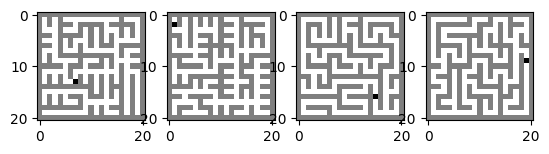

In [56]:
dataiter_test = iter(testLoader)
this_iter_test = next(dataiter_test)

fig, axes = plt.subplots(1,4)
axes[0].imshow(this_iter_test['data'][0].numpy(), cmap='binary')
axes[1].imshow(this_iter_test['data'][1].numpy(), cmap='binary')
axes[2].imshow(this_iter_test['data'][2].numpy(), cmap='binary')
axes[3].imshow(this_iter_test['data'][3].numpy(), cmap='binary')

this_iter_test['label'][0], this_iter_test['label'][1], this_iter_test['label'][2], this_iter_test['label'][3]

In [57]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [58]:
outputs = net(this_iter_test["data"].float().reshape(-1,1,n,n))
outputs

tensor([[-14.3480,   4.2604,   2.5923,   6.2273,   2.6549],
        [ -3.4386,  -0.5880,   1.7068,   0.4667,   2.8640],
        [-12.6588,  -0.1783,   0.8773,   5.9874,   7.4387],
        [ -5.6570,   1.9482,   0.5027,  -0.4329,   5.5558],
        [-16.2280,  11.9720,   8.4166,   3.0311,  -3.7781],
        [ -4.9351,   2.7849,   4.9084,  -0.5860,  -0.0510],
        [ -2.7555,  -0.6749,   1.5204,   0.0550,   2.8433],
        [ 11.2700,  -5.7825,   2.3895,  -7.1826,   2.1024],
        [-14.5590,   8.6247,   7.0591,   3.5674,  -1.9104],
        [ -6.5542,  -4.7268,   8.9011,   5.4468,  -0.8207],
        [-10.5179,   1.3684,   0.3887,   5.3889,   4.1844],
        [-12.0069,  -0.1801,   1.3285,   6.7687,   5.2233],
        [ -9.6028,   4.4515,   3.8209,   2.8351,  -0.1800],
        [ -7.2088,   1.8725,   4.3279,   1.5841,   1.1502],
        [ 11.9560,  -6.0305,   2.7031,  -7.4643,   1.7584],
        [ -6.9812,   3.7639,   4.9783,   1.5338,  -1.7708]],
       grad_fn=<AddmmBackward0>)

In [59]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  UP    DOWN  DOWN  DOWN 


Let us look at how the network performs on the whole dataset.

In [60]:
import numpy as np
from sklearn.metrics import f1_score

In [61]:
correct = 0
total = 0

f1_true = None
f1_predicted = None

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for current_data in testLoader:
        mazes = current_data['data'].float().reshape(-1,1,n,n)
        labels = current_data['label']
        # calculate outputs by running images through the network
        outputs = net(mazes)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if f1_true is None:
            f1_true = labels.detach().numpy()
            f1_predicted = predicted.detach().numpy()
        else:
            f1_true = np.concatenate((f1_true, labels.detach().numpy()))
            f1_predicted = np.concatenate((f1_predicted, predicted.detach().numpy()))

print(f'Accuracy of the network on the test mazes: {100 * correct // total} %')

# F1 score
score = f1_score(f1_true, f1_predicted, average="macro")
print(f"The F1 Score is: {score}")

Accuracy of the network on the test mazes: 78 %
The F1 Score is: 0.7897524803174951


Hmmm, what are the classes that performed well, and the classes that did not perform well:

In [63]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for current_data in testLoader:
        mazes = current_data['data'].float().reshape(-1,1,n,n)
        labels = current_data['label']
        outputs = net(mazes)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            # print(label, prediction)
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# print(total_pred)

Accuracy for class: END   is 100.0 %
Accuracy for class: LEFT  is 71.7 %
Accuracy for class: RIGHT is 75.3 %
Accuracy for class: UP    is 66.7 %
Accuracy for class: DOWN  is 81.3 %
